In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import keras
from keras.datasets import cifar10

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 12s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

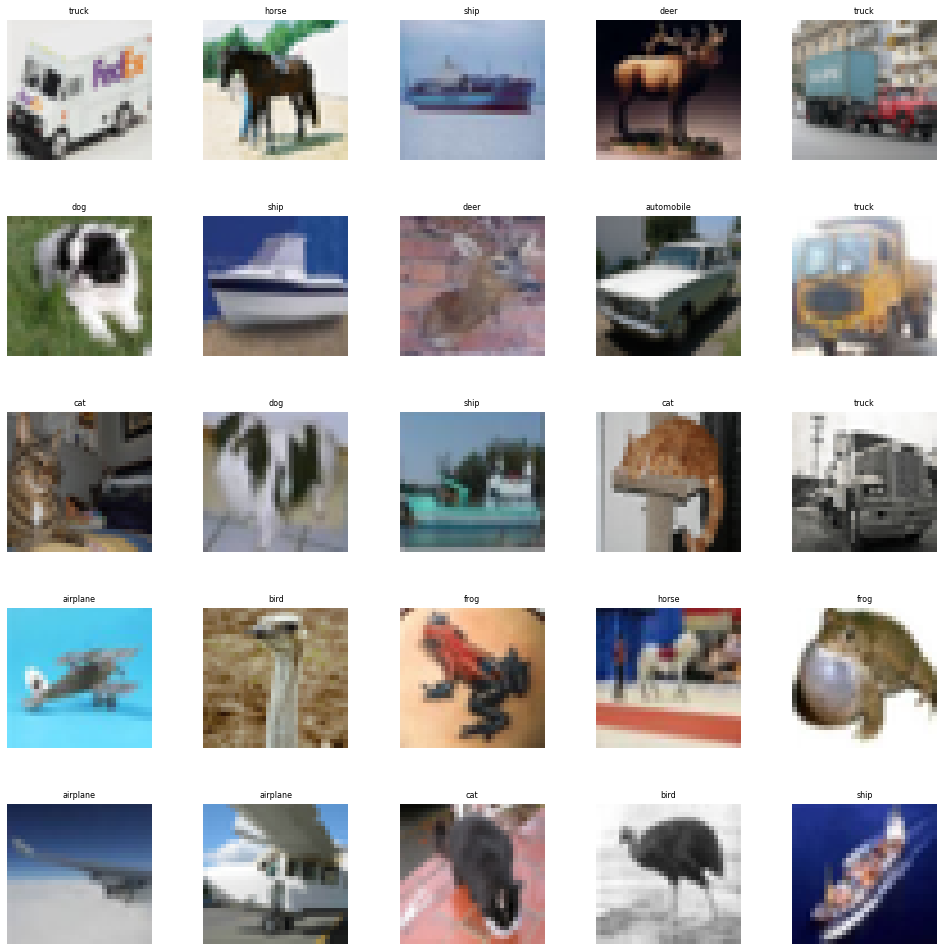

<Figure size 432x288 with 0 Axes>

In [7]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()
plt.savefig('cifar_images.png')

In [8]:
x_train = x_train/255
x_test = x_test/255

X_train_flat = np.reshape(x_train, (50000, 32*32*3))
X_test_flat = np.reshape(x_test, (10000, 32*32*3))

In [9]:
lgr = LogisticRegression(max_iter=200, class_weight='balanced', random_state=340, n_jobs = -1)

In [10]:
lgr = lgr.fit(X_train_flat, y_train.ravel())

In [11]:
lgr.predict(X_train_flat)

array([3, 1, 9, ..., 9, 9, 7], dtype=uint8)

In [12]:
y_train.ravel()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
print(confusion_matrix(y_train.ravel(), lgr.predict(X_train_flat)))
print('\n *********************')
print(classification_report(y_train.ravel(), lgr.predict(X_train_flat)))

[[2654  279  194  170  134  145  145  250  695  334]
 [ 268 2695  134  130  122  137  210  229  377  698]
 [ 473  222 1619  383  572  409  605  364  198  155]
 [ 267  279  425 1503  303  867  634  235  229  258]
 [ 308  144  650  325 1788  345  652  495  132  161]
 [ 202  244  496  712  344 1840  482  289  226  165]
 [  88  185  340  562  448  384 2599  201   76  117]
 [ 207  219  356  287  407  320  231 2452  159  362]
 [ 853  309  118  114   61  157   75   95 2799  419]
 [ 347  795  136  115   93   96  209  232  424 2553]]

 *********************
              precision    recall  f1-score   support

           0       0.47      0.53      0.50      5000
           1       0.50      0.54      0.52      5000
           2       0.36      0.32      0.34      5000
           3       0.35      0.30      0.32      5000
           4       0.42      0.36      0.39      5000
           5       0.39      0.37      0.38      5000
           6       0.44      0.52      0.48      5000
           7

In [14]:
print(confusion_matrix(y_test.ravel(), lgr.predict(X_test_flat)))
print('\n *********************')
print(classification_report(y_test.ravel(), lgr.predict(X_test_flat)))

[[506  47  50  28  31  25  25  48 167  73]
 [ 57 468  31  30  28  35  38  54  89 170]
 [106  45 286  91 121  76 137  75  42  21]
 [ 42  61 102 244  62 204 140  51  37  57]
 [ 59  22 134  74 307  83 162 103  28  28]
 [ 42  52 103 153  91 327  90  65  47  30]
 [ 20  33  68 123 101  84 492  44  14  21]
 [ 50  52  71  68  78  82  46 445  37  71]
 [166  65  24  29  11  44  15  21 540  85]
 [ 70 176  26  25  18  22  52  51  95 465]]

 *********************
              precision    recall  f1-score   support

           0       0.45      0.51      0.48      1000
           1       0.46      0.47      0.46      1000
           2       0.32      0.29      0.30      1000
           3       0.28      0.24      0.26      1000
           4       0.36      0.31      0.33      1000
           5       0.33      0.33      0.33      1000
           6       0.41      0.49      0.45      1000
           7       0.46      0.45      0.45      1000
           8       0.49      0.54      0.52      1000
    

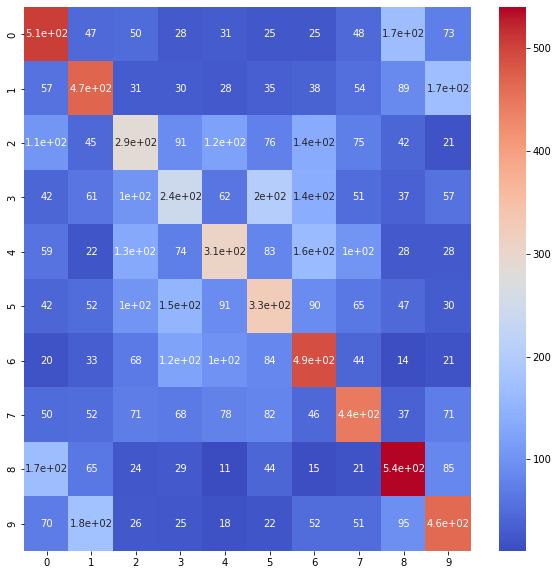

In [15]:
viz = confusion_matrix(y_test.ravel(), lgr.predict(X_test_flat))
plt.figure(figsize=(10,10))
sns.heatmap(viz,
            cmap='coolwarm',
            annot=True);

In [16]:
import numpy as np

In [17]:
X_train_flat.shape

(50000, 3072)

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
inputs = tf.keras.Input(shape= (32,32,3), name = 'input')
x = tf.keras.layers.Conv2D(128,kernel_size = (2,2), activation='relu', name='conv1')(inputs)
x = tf.keras.layers.Conv2D(64,kernel_size = (2,2), activation='relu', name='conv2')(x)
x = tf.keras.layers.MaxPool2D(name = 'block1')(x)
x = tf.keras.layers.Conv2D(32,kernel_size = (3,3), activation='relu', name='conv3')(x)
x = tf.keras.layers.Conv2D(8,kernel_size = (2,2), activation='relu', name='conv4')(x)
x = tf.keras.layers.MaxPool2D(name = 'block2')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu', name='dense_1')(x)
#x = Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu', name='dense_2')(x)
#x = Dropout(0.1)(x)
x = tf.keras.layers.Dense(32, activation='relu', name='dense_3')(x)

x = tf.keras.layers.Dense(16, activation='relu', name='dense_4')(x)

output = Dense(10, activation='softmax', name = 'predictions')(x)

model1 = tf.keras.Model(inputs=inputs, outputs=output)

In [20]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 31, 31, 128)       1664      
                                                                 
 conv2 (Conv2D)              (None, 30, 30, 64)        32832     
                                                                 
 block1 (MaxPooling2D)       (None, 15, 15, 64)        0         
                                                                 
 conv3 (Conv2D)              (None, 13, 13, 32)        18464     
                                                                 
 conv4 (Conv2D)              (None, 12, 12, 8)         1032      
                                                                 
 block2 (MaxPooling2D)       (None, 6, 6, 8)           0     

In [21]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=tf.keras.metrics.CategoricalAccuracy())

early_stopping = EarlyStopping(monitor='val_categorical_accuracy', patience=3, mode='max', verbose=1)
callbacks=[early_stopping]

In [22]:
history1 = model1.fit(x_train, y_cat_train, epochs=20,
          validation_split=0.3,
          batch_size=32,callbacks=callbacks)

Epoch 1/20
1094/1094 [==============================] - 30s 19ms/step - loss: 1.7616 - categorical_accuracy: 0.3387 - val_loss: 1.5630 - val_categorical_accuracy: 0.4546
Epoch 2/20
1094/1094 [==============================] - 21s 19ms/step - loss: 1.3012 - categorical_accuracy: 0.5287 - val_loss: 1.2575 - val_categorical_accuracy: 0.5450
Epoch 3/20
1094/1094 [==============================] - 18s 17ms/step - loss: 1.1151 - categorical_accuracy: 0.6013 - val_loss: 1.1059 - val_categorical_accuracy: 0.6073
Epoch 4/20
1094/1094 [==============================] - 21s 19ms/step - loss: 0.9895 - categorical_accuracy: 0.6466 - val_loss: 1.0695 - val_categorical_accuracy: 0.6251
Epoch 5/20
1094/1094 [==============================] - 18s 17ms/step - loss: 0.8908 - categorical_accuracy: 0.6836 - val_loss: 1.0293 - val_categorical_accuracy: 0.6349
Epoch 6/20
1094/1094 [==============================] - 19s 17ms/step - loss: 0.7842 - categorical_accuracy: 0.7253 - val_loss: 1.0259 - val_categoric

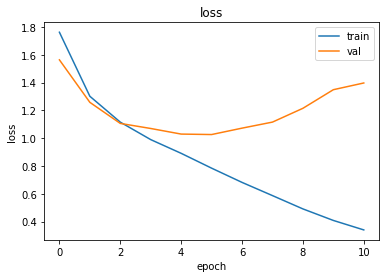

In [23]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

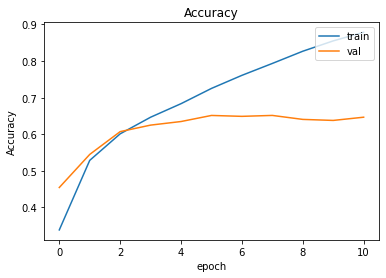

In [24]:
plt.plot(history1.history['categorical_accuracy'])
plt.plot(history1.history['val_categorical_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [25]:
Y_train_pred = model1.predict(x_train)
Y_test_pred = model1.predict(x_test)

In [26]:
y_train_pred =[]
for i in Y_train_pred:
    y_train_pred.append(np.argmax(i))


y_test_pred =[]
for i in Y_test_pred:
    y_test_pred.append(np.argmax(i))

In [27]:
print(confusion_matrix(y_train, y_train_pred))

print(classification_report(y_train, y_train_pred))

[[4327   38  107   46   51   13   23   32  209  154]
 [  37 4344   10   13    9    2   19   12   72  482]
 [ 125    6 4030  152  252   71  228   60   35   41]
 [  51   16  190 3650  270  185  385   94   36  123]
 [  48    6  284  116 4191   17  138  155    7   38]
 [  23   16  225  904  281 3076  200  222   11   42]
 [  18   11  121  108  189   18 4460   19   10   46]
 [  28    7  146   95  221   71   31 4313    5   83]
 [ 235   63   45   38   15   10   19    8 4466  101]
 [  48   83   42   25   11    2   33   22   60 4674]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5000
           1       0.95      0.87      0.91      5000
           2       0.78      0.81      0.79      5000
           3       0.71      0.73      0.72      5000
           4       0.76      0.84      0.80      5000
           5       0.89      0.62      0.73      5000
           6       0.81      0.89      0.85      5000
           7       0.87      0.86   

In [28]:
print(confusion_matrix(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

[[677  23  53  30  23   4  16  19  90  65]
 [ 14 727   7   5   3   4  11   3  52 174]
 [ 76   3 547  74 101  45  82  37  15  20]
 [ 23  10  94 429 105  86 122  54  19  58]
 [ 18   7 113  58 631  17  63  72   6  15]
 [ 17   6 105 269  68 378  56  73   7  21]
 [  8   3  40  47  71   4 781  11  10  25]
 [ 10   8  63  48  98  29  18 686   4  36]
 [ 96  35  18  27   6   6  15   4 748  45]
 [ 34  45  11  10   3   6  13  15  29 834]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.84      0.73      0.78      1000
           2       0.52      0.55      0.53      1000
           3       0.43      0.43      0.43      1000
           4       0.57      0.63      0.60      1000
           5       0.65      0.38      0.48      1000
           6       0.66      0.78      0.72      1000
           7       0.70      0.69      0.70      1000
           8       0.76      0.75      0.76      1000
           9       0.65     

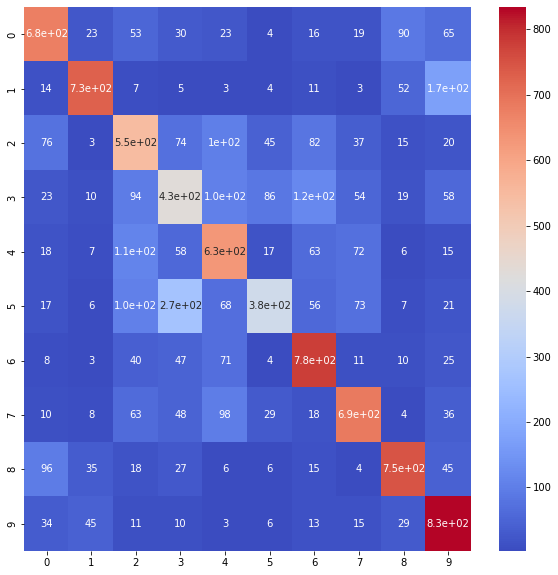

In [29]:
viz = confusion_matrix(list(y_test), y_test_pred)
#mask = np.zeros_like(viz, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(viz,
            cmap='coolwarm',
            annot=True);

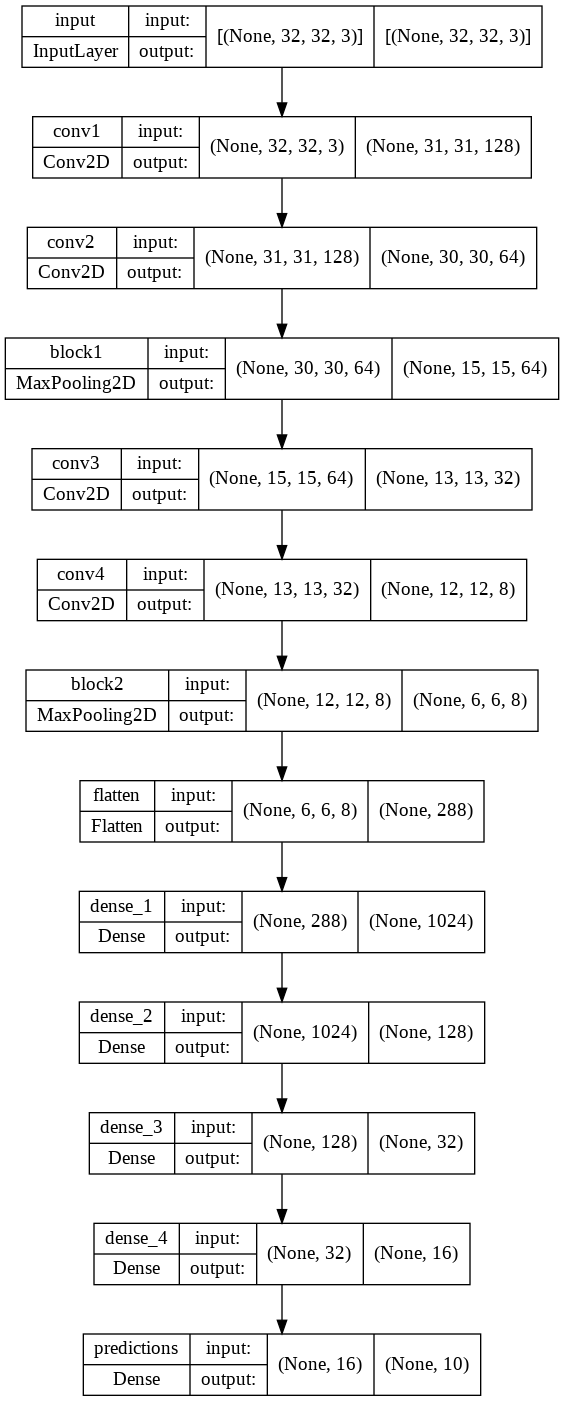

In [30]:
tf.keras.utils.plot_model(model1, to_file="cnn_architecture.png", show_shapes=True)